In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# from google.colab import files
# uploaded = files.upload()

## Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


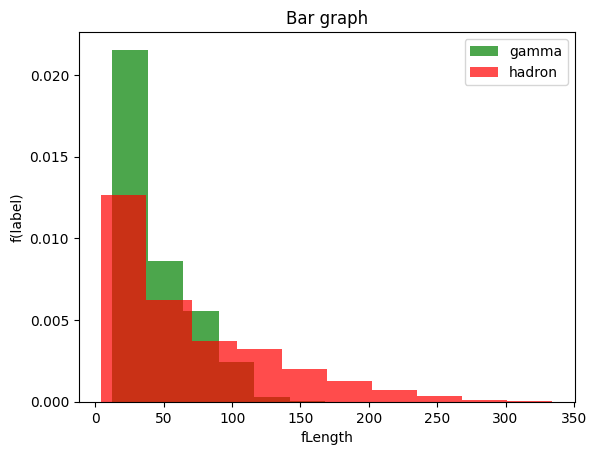

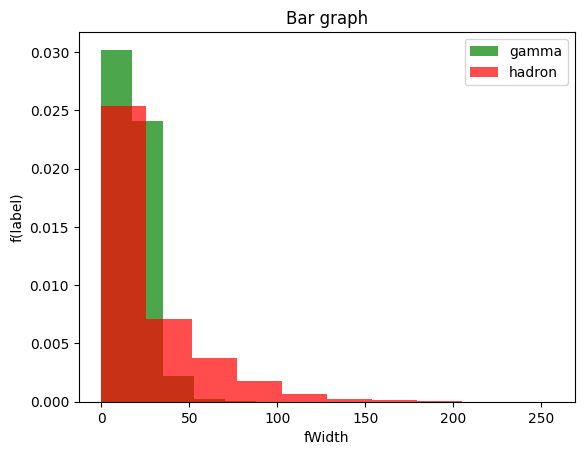

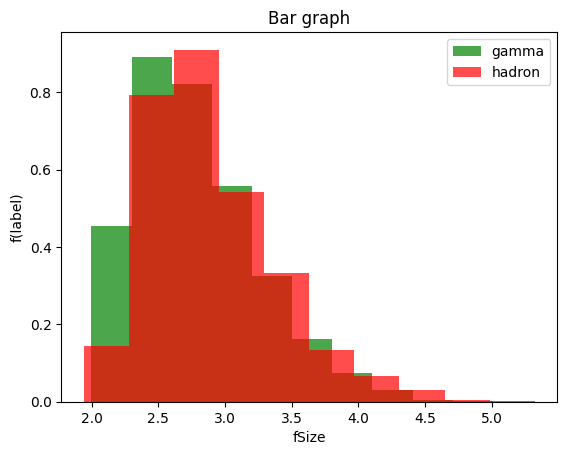

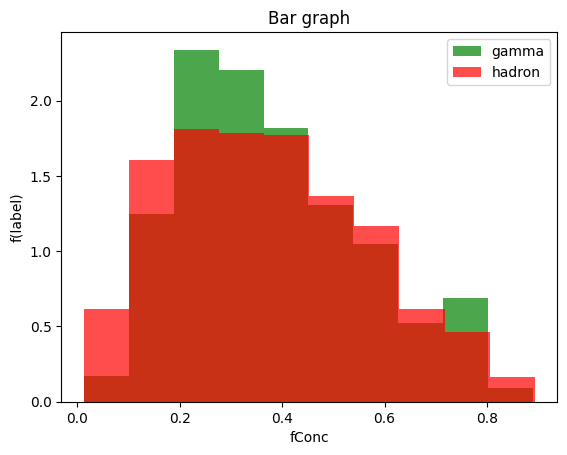

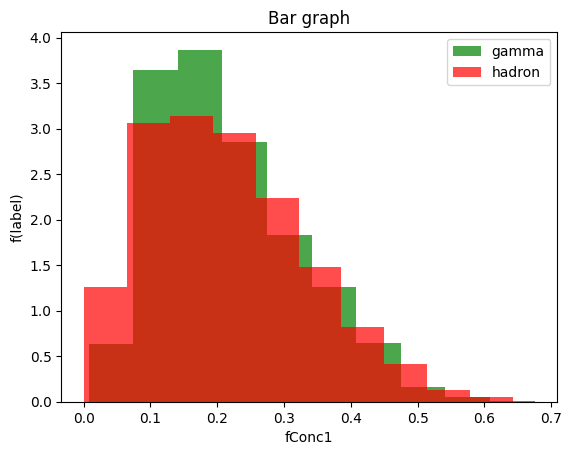

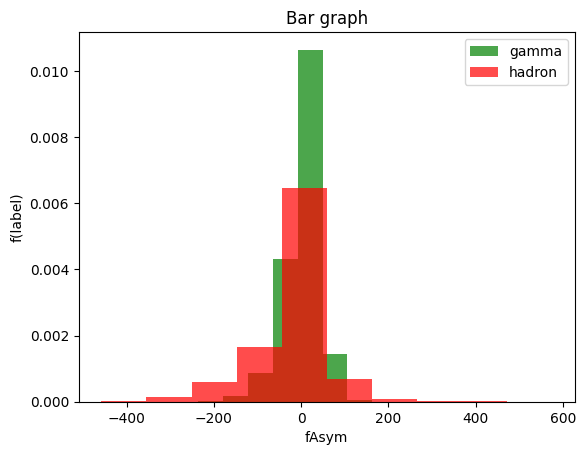

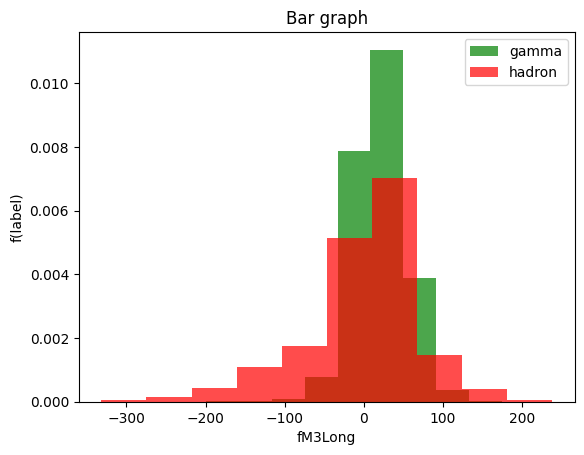

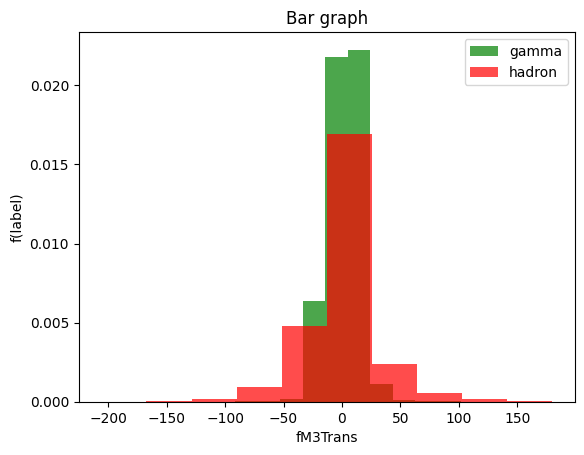

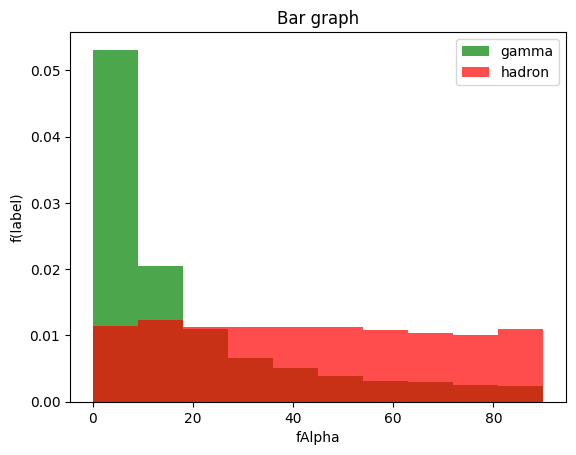

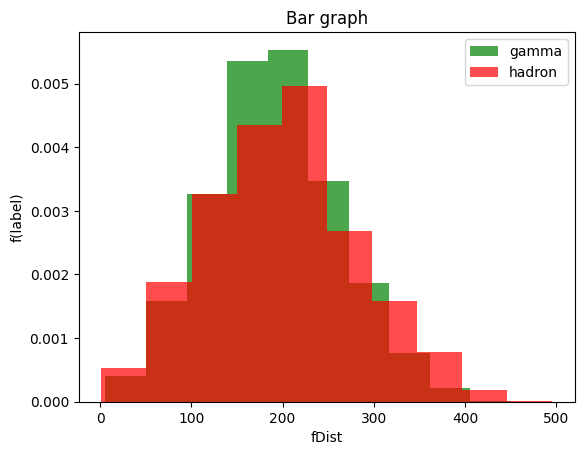

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='green',label = 'gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color='red',label = 'hadron', alpha = 0.7 ,density = True)
  plt.xlabel(label)
  plt.ylabel("f(label)")
  plt.title("Bar graph")
  plt.legend()
  plt.show()

## train, valid, test


In [ ]:
## train, valid, test

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [ ]:
#oversample is flag
def scale_dataset(dataframe, oversample = False):
  #col all feature without class last col
  X = dataframe[dataframe.columns[:-1]].values
  #col class
  y = dataframe[dataframe.columns[-1]].values

  #giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1. ->StandardScaler()
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # dữ liệu sẽ được cân bằng -> RandomOverSampler()
  # if flag (true)
  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
  # nối mảng X và mảng y
  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
# train : predict classes (filter,...)
# valid: performance evaluation ( hiệu suất) rate, amount,...
# test:


## KNN (supervised learning)

In [ ]:
## KNN (Nó được sử dụng cho các tác vụ phân loại (classification) và dự đoán giá trị liên tục (regression).)

In [ ]:
# KNN libray
from sklearn.neighbors import KNeighborsClassifier
#
from sklearn.metrics import classification_report

In [ ]:
# n_neighbors = 1: consider values (neighbour) to classific 1 point/ data
knn_model = KNeighborsClassifier(n_neighbors = 1)
# train kNN
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)


In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1310
           1       0.84      0.89      0.87      2494

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.79      3804
weighted avg       0.82      0.82      0.82      3804



In [ ]:
##
'''
- Dữ liệu có số chiều thấp: Khi số chiều của dữ liệu thấp (ví dụ: dữ liệu có ít đặc trưng),
kNN có thể hoạt động hiệu quả với số lượng hàng (số lượng mẫu) không quá lớn.
Điều này là do việc tính toán khoảng cách giữa các điểm dữ liệu là phức tạp và tốn nhiều thời gian khi số lượng hàng lớn.

- Dữ liệu không cân bằng: Khi dữ liệu không cân bằng, tức là có một số lớp có số lượng
mẫu ít hơn so với các lớp khác, kNN có thể cung cấp dự đoán tốt cho các lớp thiểu số.
Điều này là do kNN không giả định gì về phân phối của dữ liệu và có khả năng làm việc tốt với các lớp có số lượng mẫu ít.

- Không yêu cầu giả định: kNN không giả định gì về phân phối của dữ liệu,
nó chỉ dựa vào khoảng cách giữa các điểm dữ liệu. Do đó, nó là một thuật toán linh hoạt
có thể hoạt động với nhiều loại dữ liệu.

- Dữ liệu có cấu trúc không rõ ràng: Khi dữ liệu không có cấu trúc rõ ràng hoặc không
có mô hình tường minh, kNN có thể là lựa chọn tốt để thực hiện dự đoán dựa trên thông
tin từ các điểm dữ liệu gần nhất.

- Vấn đề đơn giản: Khi chỉ cần một giải pháp đơn giản và dễ hiểu mà không cần quan tâm
đến việc tối ưu hóa các tham số phức tạp, kNN là một sự lựa chọn tốt.
'''

In [ ]:
##
'''
- Low-dimensional data: When the data has a low number of dimensions (e.g., data with few features),
kNN can be effective with a not-too-large number of rows (samples). This is because computing distances
between data points becomes computationally complex and time-consuming when the number of rows is large.

- Imbalanced data: When dealing with imbalanced data, meaning some classes have fewer samples than others,
kNN can provide good predictions for the minority classes. This is because kNN does not make assumptions
about the data distribution and can work well with classes having a small number of samples.

- No assumption required: kNN does not make any assumptions about the data distribution; it solely relies
on the distances between data points. Therefore, it is a flexible algorithm that can work with various types of data.

- Unclear data structure: When the data lacks a clear structure or lacks an explicit model, kNN can be a
good choice for making predictions based on information from the nearest data points.

- Simplicity: When a simple and understandable solution is sufficient without the need for optimizing
complex parameters, kNN is a good choice.
'''

Bayes's rule:
P(A|B) = (P(B|A) * P(A))/P(B)

Naive Bayes' rule

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1310
           1       0.74      0.89      0.81      2494

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic regression

In [ ]:
## logistic regression ( sử dụng chủ yếu để dự đoán các biến mục tiêu (outcome) nhị phân, có chỉ hai giá trị là 0 và 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1310
           1       0.85      0.83      0.84      2494

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [ ]:
## SVM (Using classification classes and binary)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1310
           1       0.90      0.89      0.89      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural networks

In [ ]:
## neural networks

In [ ]:
'''
Phân loại: Mạng Neural có thể được sử dụng để phân loại dữ liệu vào các nhóm khác nhau.
Ví dụ, phân loại email là thư rác hay không thư rác, phân loại ảnh là chó, mèo, hoặc xe hơi, v.v.

Dự đoán và hồi quy: Mạng Neural có thể được sử dụng để dự đoán giá trị số hoặc dự đoán các giá trị trong tương lai.
Ví dụ, dự đoán giá cổ phiếu, dự đoán doanh số bán hàng, v.v.

Xử lý ngôn ngữ tự nhiên (NLP): Mạng Neural có thể được sử dụng để hiểu và tạo ra ngôn ngữ tự nhiên.
Ví dụ, dịch thuật máy, phân loại cảm xúc từ văn bản, v.v.

Xử lý ảnh và thị giác máy tính: Mạng Neural có khả năng trích xuất các đặc trưng từ hình ảnh và nhận diện
các đối tượng trong ảnh.
Ví dụ, nhận dạng khuôn mặt, nhận dạng biển số xe, v.v.'''

In [ ]:
'''
Classification: Neural Networks can be used to classify data into different categories.
For example, classifying emails as spam or non-spam, classifying images as dogs, cats, or cars, etc.

Prediction and Regression: Neural Networks can be used to predict numerical values or forecast future values.
For example, predicting stock prices, forecasting sales volume, etc.

Natural Language Processing (NLP): Neural Networks can be used to understand and generate natural language.
For example, machine translation, sentiment analysis from text, etc.

Image Processing and Computer Vision: Neural Networks have the ability to extract features from images
and recognize objects in images.
For example, facial recognition, license plate recognition, etc.
'''

In [ ]:
import tensorflow as tf

In [ ]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label = 'loss')
#   plt.plt(history.history['val_loss'], label == 'val_loss')
#   plt.xlabel('Epoch')
#   plt.ylabel('Binary crossentropy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

# def plot_accuracy(history):
#   plt.plot(history.history['accuracy'], label = 'accuracy')
#   plt.plt(history.history['val_accuracy'], label == 'val_accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
# *lr: learning rate
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), # -> 1 neuron
      tf.keras.layers.Dropout(dropout_prob), # -> avoid overfitting
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [ ]:
least_val_loss = float('inf') # in valid losest
least_loss_model = None # keep
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))